In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [83]:
dp = pd.read_csv('/Users/idealguy/Downloads/Accident_Information.csv')

/var/folders/40/n1r3ftp96k1dlj9xk7z01qsc0000gn/T/ipykernel_70446/817062074.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  dp = pd.read_csv('/Users/idealguy/Downloads/Accident_Information.csv')


In [84]:
dp

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,None,2005-01-04,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,None,2005-01-05,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,None,30.0,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,None,2005-01-06,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,None,2005-01-07,Friday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,None,2005-01-10,Monday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,21:13,Urban,Fine no high winds,2005,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2047251,2017984121017,A(M),74.0,NaN,0.0,Slight,None,2017-12-17,Sunday,1.0,...,Dumfries and Galloway,Frost or ice,Dual carriageway,None,70.0,11:30,Rural,Other,2017,Yes
2047252,2017984121217,C,69.0,NaN,0.0,Slight,Pedestrian in carriageway - not injured,2017-12-15,Friday,2.0,...,Dumfries and Galloway,Dry,Single carriageway,None,20.0,13:00,Urban,Fine no high winds,2017,Yes
2047253,2017984121717,A(M),74.0,Unclassified,0.0,Slight,None,2017-12-18,Monday,1.0,...,Dumfries and Galloway,Wet or damp,Dual carriageway,None,70.0,13:30,Rural,Fine no high winds,2017,Yes
2047254,2017984122317,A,708.0,NaN,0.0,Slight,None,2017-07-18,Tuesday,1.0,...,Dumfries and Galloway,Dry,Single carriageway,None,60.0,18:00,Rural,Fine no high winds,2017,Yes


In [85]:
dp.describe()

,1st_Road_Number,2nd_Road_Number,Did_Police_Officer_Attend_Scene_of_Accident,Latitude,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Speed_limit,Year
count,2.047254e+06,2.029663e+06,2.046978e+06,2.047082e+06,2.047092e+06,2.047092e+06,2.047081e+06,2.047256e+06,2.047256e+06,2.044336e+06,2.043696e+06,2.047219e+06,2.047256e+06
mean,9.921051e+02,3.728153e+02,1.202319e+00,5.255978e+01,4.414462e+05,2.968855e+05,-1.410155e+00,1.345843e+00,1.833525e+00,1.041707e-02,7.518021e-01,3.884360e+01,2.010524e+03
std,1.809408e+03,1.287796e+03,4.081935e-01,1.445506e+00,9.549620e+04,1.605273e+05,1.403532e+00,8.179627e-01,7.150543e-01,1.351126e-01,1.835289e+00,1.414791e+01,3.765624e+00
min,0.000000e+00,0.000000e+00,1.000000e+00,4.991294e+01,6.495000e+04,1.029000e+04,-7.516225e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.005000e+03
25%,0.000000e+00,0.000000e+00,1.000000e+00,5.148540e+01,3.780635e+05,1.777568e+05,-2.329610e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,3.000000e+01,2.007000e+03
50%,1.180000e+02,0.000000e+00,1.000000e+00,5.223758e+01,4.430500e+05,2.611835e+05,-1.362233e+00,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,3.000000e+01,2.010000e+03
75%,7.020000e+02,0.000000e+00,1.000000e+00,5.345590e+01,5.242982e+05,3.956100e+05,-2.052600e-01,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,5.000000e+01,2.014000e+03
max,9.999000e+03,9.999000e+03,3.000000e+00,6.075754e+01,6.555400e+05,1.208800e+06,1.762010e+00,9.300000e+01,6.700000e+01,2.000000e+00,8.000000e+00,7.000000e+01,2.017000e+03


In [86]:
dp = dp.drop(columns=['Accident_Index','Police_Force','Carriageway_Hazards','Special_Conditions_at_Site','Police_Force','Did_Police_Officer_Attend_Scene_of_Accident','Date','Pedestrian_Crossing-Physical_Facilities','Pedestrian_Crossing-Human_Control','1st_Road_Class','1st_Road_Number','2nd_Road_Class','2nd_Road_Number','Latitude','Longitude','Location_Easting_OSGR','Location_Northing_OSGR','LSOA_of_Accident_Location','InScotland'], axis=1)

In [87]:
dp

,Accident_Severity,Day_of_Week,Junction_Control,Junction_Detail,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year
0,Serious,Tuesday,Data missing or out of range,Not at junction or within 20 metres,Daylight,Kensington and Chelsea,Kensington and Chelsea,1,1,Wet or damp,Single carriageway,30.0,17:42,Urban,Raining no high winds,2005
1,Slight,Wednesday,Auto traffic signal,Crossroads,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,1,1,Dry,Dual carriageway,30.0,17:36,Urban,Fine no high winds,2005
2,Slight,Thursday,Data missing or out of range,Not at junction or within 20 metres,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,1,2,Dry,Single carriageway,30.0,00:15,Urban,Fine no high winds,2005
3,Slight,Friday,Data missing or out of range,Not at junction or within 20 metres,Daylight,Kensington and Chelsea,Kensington and Chelsea,1,1,Dry,Single carriageway,30.0,10:35,Urban,Fine no high winds,2005
4,Slight,Monday,Data missing or out of range,Not at junction or within 20 metres,Darkness - lighting unknown,Kensington and Chelsea,Kensington and Chelsea,1,1,Wet or damp,Single carriageway,30.0,21:13,Urban,Fine no high winds,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2047251,Slight,Sunday,Data missing or out of range,Not at junction or within 20 metres,Daylight,Dumfries and Galloway,Dumfries & Galloway,1,1,Frost or ice,Dual carriageway,70.0,11:30,Rural,Other,2017
2047252,Slight,Friday,Data missing or out of range,Not at junction or within 20 metres,Daylight,Dumfries and Galloway,Dumfries & Galloway,1,1,Dry,Single carriageway,20.0,13:00,Urban,Fine no high winds,2017
2047253,Slight,Monday,Give way or uncontrolled,Slip road,Daylight,Dumfries and Galloway,Dumfries & Galloway,1,2,Wet or damp,Dual carriageway,70.0,13:30,Rural,Fine no high winds,2017
2047254,Slight,Tuesday,Data missing or out of range,Not at junction or within 20 metres,Daylight,Dumfries and Galloway,Dumfries & Galloway,1,1,Dry,Single carriageway,60.0,18:00,Rural,Fine no high winds,2017


In [88]:
dp.isnull().sum()

Accident_Severity               0
Day_of_Week                     0
Junction_Control                0
Junction_Detail                 0
Light_Conditions                0
Local_Authority_(District)      0
Local_Authority_(Highway)       0
Number_of_Casualties            0
Number_of_Vehicles              0
Road_Surface_Conditions         0
Road_Type                       0
Speed_limit                    37
Time                          156
Urban_or_Rural_Area             0
Weather_Conditions              0
Year                            0
dtype: int64

In [89]:
dp.dropna()

,Accident_Severity,Day_of_Week,Junction_Control,Junction_Detail,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year
0,Serious,Tuesday,Data missing or out of range,Not at junction or within 20 metres,Daylight,Kensington and Chelsea,Kensington and Chelsea,1,1,Wet or damp,Single carriageway,30.0,17:42,Urban,Raining no high winds,2005
1,Slight,Wednesday,Auto traffic signal,Crossroads,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,1,1,Dry,Dual carriageway,30.0,17:36,Urban,Fine no high winds,2005
2,Slight,Thursday,Data missing or out of range,Not at junction or within 20 metres,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,1,2,Dry,Single carriageway,30.0,00:15,Urban,Fine no high winds,2005
3,Slight,Friday,Data missing or out of range,Not at junction or within 20 metres,Daylight,Kensington and Chelsea,Kensington and Chelsea,1,1,Dry,Single carriageway,30.0,10:35,Urban,Fine no high winds,2005
4,Slight,Monday,Data missing or out of range,Not at junction or within 20 metres,Darkness - lighting unknown,Kensington and Chelsea,Kensington and Chelsea,1,1,Wet or damp,Single carriageway,30.0,21:13,Urban,Fine no high winds,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2047251,Slight,Sunday,Data missing or out of range,Not at junction or within 20 metres,Daylight,Dumfries and Galloway,Dumfries & Galloway,1,1,Frost or ice,Dual carriageway,70.0,11:30,Rural,Other,2017
2047252,Slight,Friday,Data missing or out of range,Not at junction or within 20 metres,Daylight,Dumfries and Galloway,Dumfries & Galloway,1,1,Dry,Single carriageway,20.0,13:00,Urban,Fine no high winds,2017
2047253,Slight,Monday,Give way or uncontrolled,Slip road,Daylight,Dumfries and Galloway,Dumfries & Galloway,1,2,Wet or damp,Dual carriageway,70.0,13:30,Rural,Fine no high winds,2017
2047254,Slight,Tuesday,Data missing or out of range,Not at junction or within 20 metres,Daylight,Dumfries and Galloway,Dumfries & Galloway,1,1,Dry,Single carriageway,60.0,18:00,Rural,Fine no high winds,2017


In [90]:
dp.drop(columns=["Junction_Control"],inplace=True)

In [91]:
dp.loc[:, "Junction_Detail"].value_counts(dropna=False)

Not at junction or within 20 metres    827223
T or staggered junction                635349
Crossroads                             196283
Roundabout                             177214
Private drive or entrance               72751
Other junction                          59692
Slip road                               30052
More than 4 arms (not roundabout)       25551
Mini-roundabout                         22407
Data missing or out of range              734
Name: Junction_Detail, dtype: int64

**Next, let's define a new column that groups the Time the accidents happened into one of five options:**

**Morning Rush from 5am to 10am --> value 1
Office Hours from 10am to 3pm (or: 10:00 - 15:00) --> value 2
Afternoon Rush from 3pm to 7pm (or: 15:00 - 19:00) --> value 3
Evening from 7pm to 11pm (or: 19:00 - 23:00) --> value 4
Night from 11pm to 5am (or: 23:00 - 05:00) --> value 5**

In [92]:
# slice first and second string from time column
dp['Hour'] = dp['Time'].str[0:2]

# convert new column to numeric datetype
dp['Hour'] = pd.to_numeric(dp['Hour'])

# drop null values in our new column
dp = dp.dropna(subset=['Hour'])

# cast to integer values
dp['Hour'] = dp['Hour'].astype('int')

/var/folders/40/n1r3ftp96k1dlj9xk7z01qsc0000gn/T/ipykernel_70446/2581587274.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp['Hour'] = dp['Hour'].astype('int')


In [93]:
def when_was_it(hour):
    if hour >= 5 and hour < 10:
        return "1"
    elif hour >= 10 and hour < 15:
        return "2"
    elif hour >= 15 and hour < 19:
        return "3"
    elif hour >= 19 and hour < 23:
        return "4"
    else:
        return "5"

In [94]:
daytime_groups = {1: 'Morning: Between 5 and 10', 
                  2: 'Office Hours: Between 10 and 15', 
                  3: 'Afternoon Rush: Between 15 and 19', 
                  4: 'Evening: Between 19 and 23', 
                  5: 'Night: Between 23 and 5'}

In [95]:
dp['Daytime'] = dp['Hour'].apply(when_was_it)
dp[['Time', 'Hour', 'Daytime']].head()

/var/folders/40/n1r3ftp96k1dlj9xk7z01qsc0000gn/T/ipykernel_70446/143295568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp['Daytime'] = dp['Hour'].apply(when_was_it)


,Time,Hour,Daytime
0,17:42,17,3
1,17:36,17,3
2,00:15,0,5
3,10:35,10,2
4,21:13,21,4


In [96]:
dp = dp.drop(columns=['Time', 'Hour'])

In [97]:
dp

,Accident_Severity,Day_of_Week,Junction_Detail,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,Year,Daytime
0,Serious,Tuesday,Not at junction or within 20 metres,Daylight,Kensington and Chelsea,Kensington and Chelsea,1,1,Wet or damp,Single carriageway,30.0,Urban,Raining no high winds,2005,3
1,Slight,Wednesday,Crossroads,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,1,1,Dry,Dual carriageway,30.0,Urban,Fine no high winds,2005,3
2,Slight,Thursday,Not at junction or within 20 metres,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,1,2,Dry,Single carriageway,30.0,Urban,Fine no high winds,2005,5
3,Slight,Friday,Not at junction or within 20 metres,Daylight,Kensington and Chelsea,Kensington and Chelsea,1,1,Dry,Single carriageway,30.0,Urban,Fine no high winds,2005,2
4,Slight,Monday,Not at junction or within 20 metres,Darkness - lighting unknown,Kensington and Chelsea,Kensington and Chelsea,1,1,Wet or damp,Single carriageway,30.0,Urban,Fine no high winds,2005,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2047251,Slight,Sunday,Not at junction or within 20 metres,Daylight,Dumfries and Galloway,Dumfries & Galloway,1,1,Frost or ice,Dual carriageway,70.0,Rural,Other,2017,2
2047252,Slight,Friday,Not at junction or within 20 metres,Daylight,Dumfries and Galloway,Dumfries & Galloway,1,1,Dry,Single carriageway,20.0,Urban,Fine no high winds,2017,2
2047253,Slight,Monday,Slip road,Daylight,Dumfries and Galloway,Dumfries & Galloway,1,2,Wet or damp,Dual carriageway,70.0,Rural,Fine no high winds,2017,2
2047254,Slight,Tuesday,Not at junction or within 20 metres,Daylight,Dumfries and Galloway,Dumfries & Galloway,1,1,Dry,Single carriageway,60.0,Rural,Fine no high winds,2017,3


In [98]:
dp.loc[:, "Accident_Severity"].value_counts(dropna=False)

Slight     1734422
Serious     286311
Fatal        26367
Name: Accident_Severity, dtype: int64

In [99]:
dp['Day_of_Week'] = dp['Day_of_Week'].str.lower()

# Create a new column 'DayType' based on working days and weekends
dp['DayType'] = dp['Day_of_Week'].map({'monday': 'WorkingDay', 'tuesday': 'WorkingDay', 'wednesday': 'WorkingDay',
                                       'thursday': 'WorkingDay', 'friday': 'WorkingDay', 'saturday': 'Weekend', 'sunday': 'Weekend'})

dp = dp.drop(columns=['Day_of_Week'])

In [100]:
dp.drop(columns=["Local_Authority_(District)","Local_Authority_(Highway)"],inplace=True)

In [105]:
from sklearn.preprocessing import LabelEncoder
cols = [ 'Junction_Detail',"Light_Conditions","Road_Surface_Conditions","Road_Type","Urban_or_Rural_Area","Weather_Conditions","DayType"]
le = LabelEncoder()

for col in cols:
    dp[col] = le.fit_transform(dp[col])
dp.head()

,Accident_Severity,Junction_Detail,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,Year,Daytime,DayType,Junction_Detail_encoded
0,Serious,4,5,1,1,5,4,30.0,2,6,2005,3,1,4
1,Slight,0,1,1,1,1,1,30.0,2,2,2005,3,1,0
2,Slight,4,1,1,2,1,4,30.0,2,2,2005,5,1,4
3,Slight,4,5,1,1,1,4,30.0,2,2,2005,2,1,4
4,Slight,4,0,1,1,5,4,30.0,2,2,2005,4,1,4


In [106]:
dp.head()

,Accident_Severity,Junction_Detail,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,Year,Daytime,DayType,Junction_Detail_encoded
0,Serious,4,5,1,1,5,4,30.0,2,6,2005,3,1,4
1,Slight,0,1,1,1,1,1,30.0,2,2,2005,3,1,0
2,Slight,4,1,1,2,1,4,30.0,2,2,2005,5,1,4
3,Slight,4,5,1,1,1,4,30.0,2,2,2005,2,1,4
4,Slight,4,0,1,1,5,4,30.0,2,2,2005,4,1,4


In [107]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2047100 entries, 0 to 2047255
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Accident_Severity        object 
 1   Junction_Detail          int64  
 2   Light_Conditions         int64  
 3   Number_of_Casualties     int64  
 4   Number_of_Vehicles       int64  
 5   Road_Surface_Conditions  int64  
 6   Road_Type                int64  
 7   Speed_limit              float64
 8   Urban_or_Rural_Area      int64  
 9   Weather_Conditions       int64  
 10  Year                     int64  
 11  Daytime                  object 
 12  DayType                  int64  
 13  Junction_Detail_encoded  int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 234.3+ MB


In [108]:
dict={"Slight":0,"Serious":1,"Fatal":2}

dp['Accident_Severity'] = dp['Accident_Severity'].replace(dict)



/var/folders/40/n1r3ftp96k1dlj9xk7z01qsc0000gn/T/ipykernel_70446/4087370367.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dp.corr()


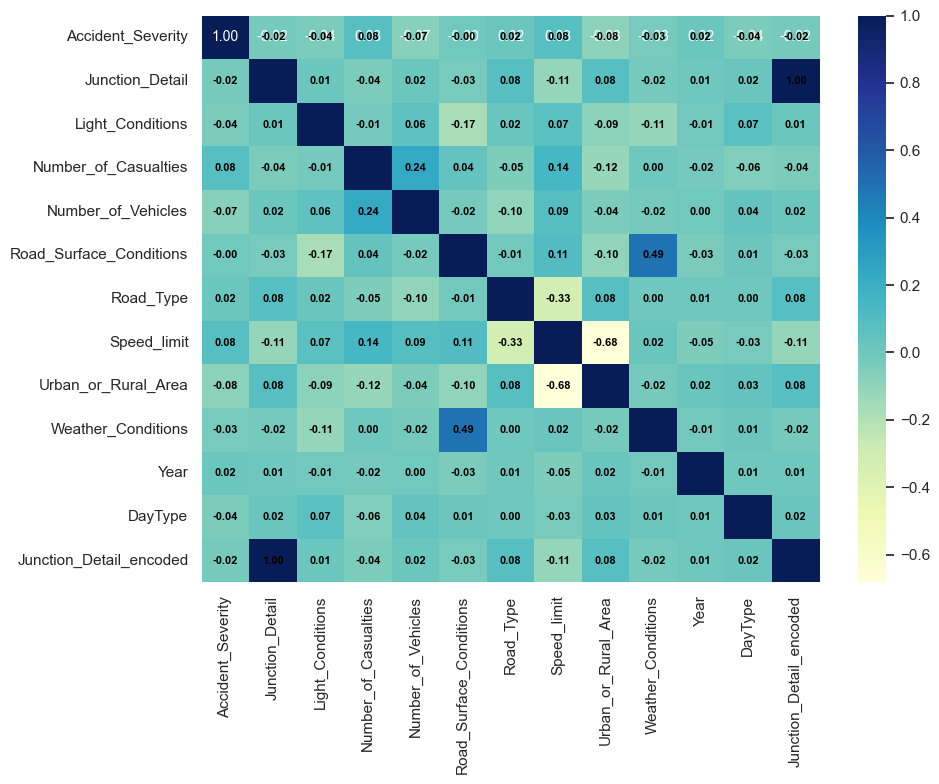

In [135]:
correlation_matrix = dp.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap with numeric values and percentages
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f",
                      annot_kws={"size": 10, "color": 'white'})

# Add value annotations
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix.columns)):
        if i != j:
            heatmap.text(j + 0.5, i + 0.5, f"{correlation_matrix.iloc[i, j]:.2f}",
                         ha="center", va="center", color='black', fontsize=8, fontweight='bold')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

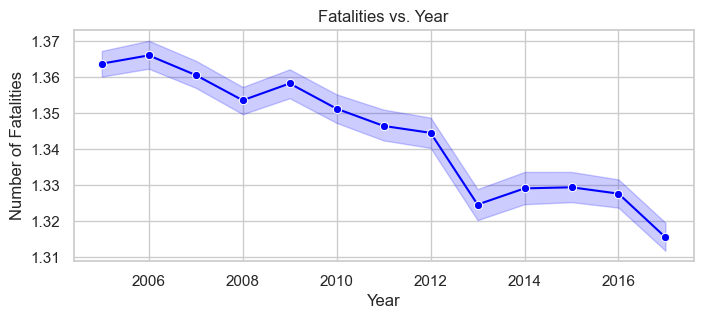

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Year' and 'Fatalities' are columns in your DataFrame dp
sns.set(style="whitegrid")
plt.figure(figsize=(8, 3))

sns.lineplot(x='Year', y='Number_of_Casualties', data=dp, marker='o', color='blue')

plt.title('Fatalities vs. Year')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')

plt.show()


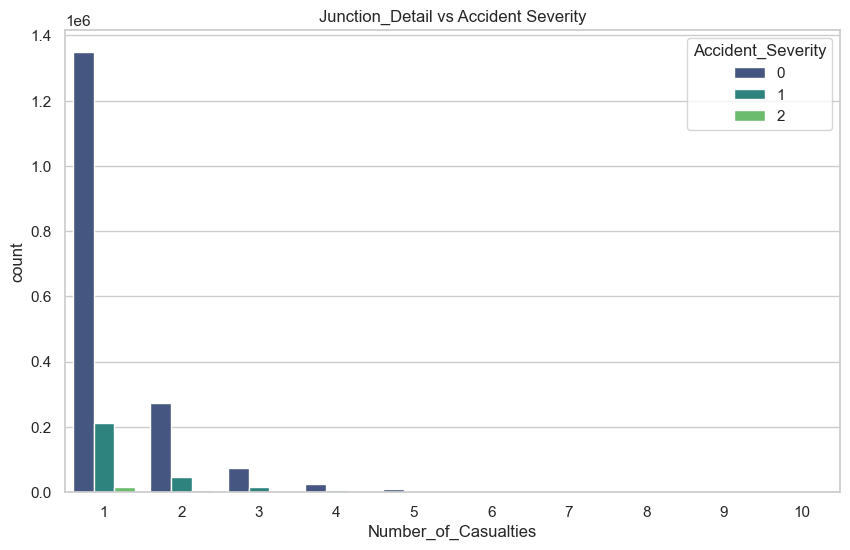

In [121]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Number_of_Casualties', hue='Accident_Severity', data=dp, palette="viridis",order=dp['Number_of_Casualties'].value_counts().index[:10])
plt.title('Junction_Detail vs Accident Severity')
plt.show()

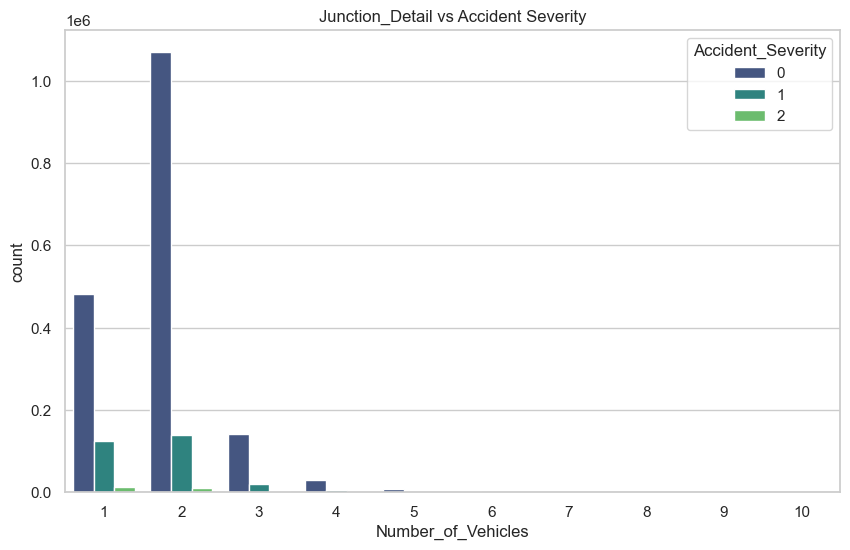

In [122]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Number_of_Vehicles', hue='Accident_Severity', data=dp, palette="viridis",order=dp['Number_of_Casualties'].value_counts().index[:10])
plt.title('Junction_Detail vs Accident Severity')
plt.show()

/var/folders/40/n1r3ftp96k1dlj9xk7z01qsc0000gn/T/ipykernel_70446/729276811.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Speed_limit', y='Accident_Severity', data=dp, palette="rocket", ci=None, order=sorted(dp['Speed_limit'].unique()))


<Figure size 1000x600 with 0 Axes>

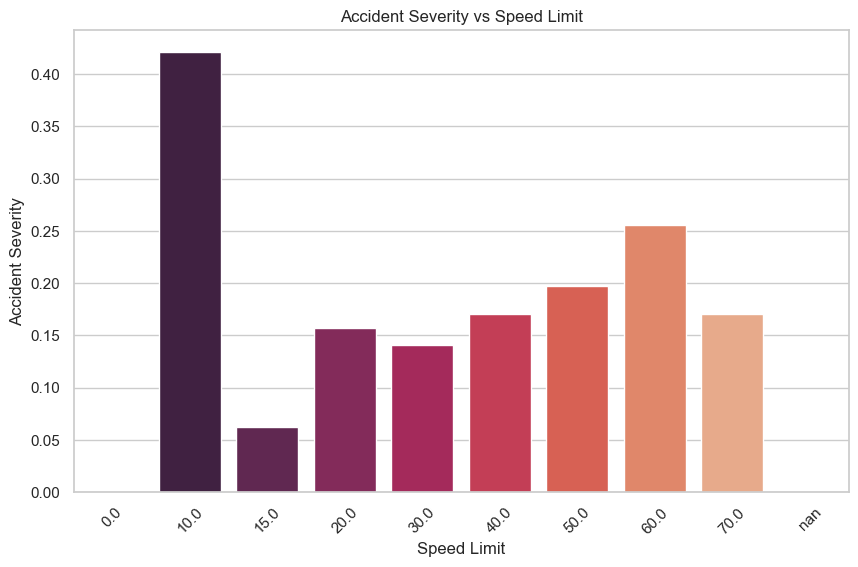

In [130]:
plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))
sns.barplot(x='Speed_limit', y='Accident_Severity', data=dp, palette="rocket", ci=None, order=sorted(dp['Speed_limit'].unique()))
plt.title('Accident Severity vs Speed Limit')
plt.xlabel('Speed Limit')
plt.ylabel('Accident Severity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


